<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_YB_week6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **분류**
## **LightGBM**

In [1]:
!pip install scikit-learn==1.2.2
!pip install xgboost==1.7.6
!pip install numpy==1.23.5

LightGBM은 XGBoost와 함께 부슽이 계열 알고리즘에서 가장 각광을 받고 있다. XGBoosts는 매우 뛰어난 부슽이 알고리즘이지만 하이퍼 파라미터 튜닝을 수행하다 보면 수행 시간이 너무 오래 걸린다는 단점이 있다.

LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 점이다. 또한 메모리 사용량도 상대적으로 적다.

LightGBM과 XGBoost의 예측 성능은 별다른 차이가 없다. 또한 기능 상의 다양성은 LightGBM이 약간 더 많다. LightGBM의 한 가지 단점으로 알려진 것은 적은 데이터 세트(일반적으로 10,000건 이하)에 적용할 경우 과적합이 발생하기 쉽다는 것이다.

LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 사용한다. 기존의 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리 분할(Level Wise) 방식을 사용한다. 즉, 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 트리의 깊이가 최소화될 수 있고 오버피팅에 보다 더 강한 구조를 가질 수 있다. 반대로 균형을 맞추기 위한 시간이 필요하다는 상대적이 단점이 있지만, LightGBM의 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성된다. 하지만 이렇게 최대 손실값을 갖는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할 수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있다는 것이 LightGBM의 구현 사상이다.

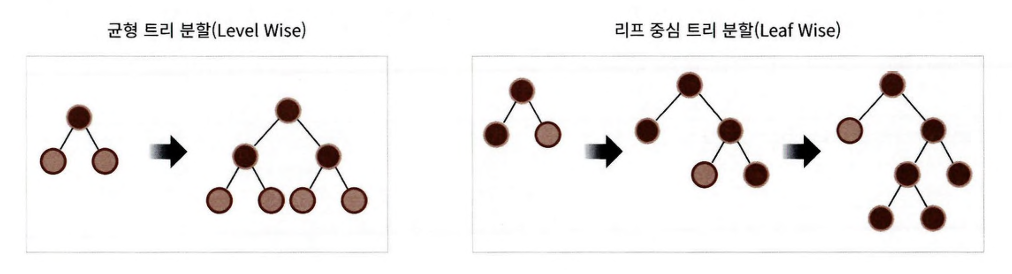

LightGBM의 XGBoost 대비 장점은 다음과 같이 정리할 수 있다.
- 더 빠른 학습과 예측 수행 시간
- 더 적은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩을 사용하지 않고도 피처를 최적으로 변환하고 이에 따른 노드 분할 수행).

또한, LightGBM은 XGBoost와 마찬가지로 대용량 데이터에 대한 뛰어난 예측 성능 및 병렬 컴퓨팅 기능을 제공하고 있으며, 최근에는 GPU까지 지원하고 있다.

LightGBM의 파이썬 패키지명은 'lightgbm'이다. LightGBM도 초기에는 파있너 래퍼용 LightGBM만 개발되었고 이후 사이킷런과의 호환성을 지원하기 위해 사이킷런 래퍼 LightGBM이 추가로 개발되었으며 lightgbm 패키지 내에 이 두 개의 래퍼 모듈을 모두 가지고 있다. 사이킷런 래퍼 LightGBM 클래스는 분류를 위한 LGBMClassifier 클래스와 회귀를 위한 LGBMRegressor 클래스이다.

이 클래스는 사이킷런의 기반 Estimator를 상속 받아 작성됐기 때문에 fit( ), predict( ) 기반의 학습 및 예측과 사이킷런이 제공하는 다양한 유틸리티의 활용이 가능하다.

### **LightGBM 하이퍼 파라미터**
LightGBM 하이퍼 파라미터는 XGBoost와 많은 부분이 유사하다. 주의해야 할 점은 LightGBM은 XGBoost와 다르게 리프 노드가 계속 분할되면서 트리의 깊이가 깊어지므로 이러한 트리 특성에 맞는 하이퍼 파라미터 설정이 필요하다는 점이다.

**주요 파라미터**
- **num_iterations** [default=100]: 반복 수행하려는 트리의 개수를 지정한다. 크게 지정할수록 예측 성능이 높아질 수 있으나, 너무 크게 지정하면 오히려 과적합으로 성능이 저하될 수 있다.
- **learning_rate** [default=0.1]: 0과 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값이다. 일반적으로 n_estimators를 크게 하고 learning_rate를 작게 해서 예측 성능을 향상시킬 수 있으나, 마찬가지로 과적합 이슈와 학습시간이 길어지는 부정적인 영향도 고려해야 한다.
- **max_depth** [default=1]: 트리 기반 알고리즘의 max_depth와 같다.
- **min_data_in_leaf** [default=20]: 결정 트리의 min_samples_leaf와 같은 파라미터이다. 최종 결정 클래스인 리프 노드가 되기 위해 최소한으로 필요한 레코드 수이며 과적합을 제어하기 위한 파라미터이다.
- **num_leaves** [default=31]: 하나의 트리가 가질 수 있는 최대 리프 개수이다.
- **boosting** [default=gbdt]: 부스팅 트리를 생성하는 알고리즘을 기술한다.
  - gbdt: 일반적인 그래디언트 부스팅 결정 트리
  - rf: 랜덤 포레스트
- **bagging_fraction** [default=1.0]: 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정한다.
- **feature_fraction** [default=1.0]: 개별 트리를 학습할 때마다 선택하는 피처의 비율로 과적합을 막기 위해 사용된다.
- **lambda_l2** [default=0.0]: L2 regulation 제어를 위한 값이다. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.
- **lambda_l1** [default=0.0]: L1 regulation 제어를 위한 값이다. 과적합 제어를 위한 것이다.

**Learning Task 파라미터**
- objective: 최솟값을 가져야 할 손실함수를 정의한다. 애플리케이션 유형, 즉 회귀, 다중 클래스 분류, 이진 분류인지에 따라 objective인 손실함수가 지정된다.

### **하이퍼 파라미터 튜닝 방안**
num_leaves의 개수를 중심으로 min_child_smaples(min_data_in_leaf), max_depth를 함께 조정하며 모델의 복잡도를 줄이는 것이 기본 튜닝 방안이다.
- num_leaves는 개별 트리가 가질 수 있는 최대 리프의 개수이고 LightGBM 모델의 복잡도를 제어하는 주요 파라미터이다. 일반적으로 num_leaves의 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델의 복잡도가 커져 과적합 영향도가 커진다.
- min_data_in_leaf는 사이킷런 래퍼 클래스에서는 min_child_samples로 이름이 바뀐다. 과적합을 개선하기 위한 중요한 파라미터이다. num_leaves와 학습 데이터의 크기에 따라 달라지지만, 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지한다.
- max_depth는 명시적으로 깊이의 크기를 제한한다. num_leaves, min_data_in_leaf와 결합해 과적합을 개선하는 데 사용한다.

learning_rate를 작게하며 n_estiamtors를 크게하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝 방안이므로 이를 적용하는 것도 좋다.

이 밖에 과적합을 제어하기 위해 reg_lambda, reg_alpha와 같은 regularizaiton을 적용하거나 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수를 줄이기 위해 colsample_bytree, subsample 파라미터를 적용할 수 있다.

### **파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교**
LightGBM은 사이킷런과 호환하기 위해 분류를 위한 LGBMClassifier와 회귀를 위한 LGBMRegressor 클래스를 래퍼 클래스로 생성한다.

다음 표는 사이킷런 래퍼 클래스를 제공하지 않던 초기의 파이썬 래퍼 LightGBM과 사이킷런 래퍼 LightGBM 하이퍼 파라미터를 정리한 것이며, 비교를 위해 맨 오른쪽에 사이킷런 래퍼 XGBoost의 하이퍼 파라미터까지 추가하였다.

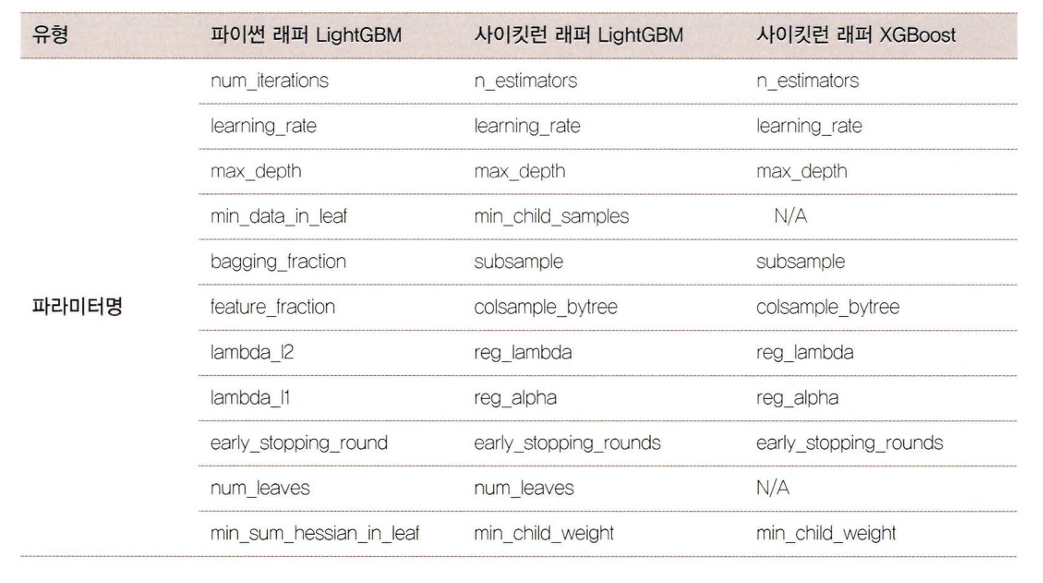

### **LightGBM 적용 - 위스콘신 유방암 예측**
LightGBM의 파이썬 패키지인 lightgbm에서 LightGBMClassifier를 임포트해 사용한다. LightGBM도 XGBoost와 동이랗게 조기 중단(early stopping)이 가능하다 XGBClassifier와 동일하게 LGBMClassifier의 fit( )에 조기 중단 관련 파라미터를 설정해주면 된다.

In [2]:
 pip install lightgbm==3.3.2

In [3]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                            test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss",
                eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.11/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

조기 중단으로 111번까지만 수행하고 학습을 종료하였다.

학습된 LightGBM 모델을 기반으로 예측 성능을 평가해보자. 앞서 사용한 get_clf_eval( ) 함수를 이용한다.

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test , pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  f1 = f1_score(y_test,pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1： {3:.4f}, AUC：{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1： 0.9677, AUC：0.9877


정확도가 약 95.61%이다.

LightGBM 파이썬 패키지인 lightgbm은 XGBoost 파이썬 패키지인 xgboost와 동일하게 피처 중요도를 시각화할 수 있는 내장 API를 제공한다. 이름도 동일하게 plot_importance( )이다.

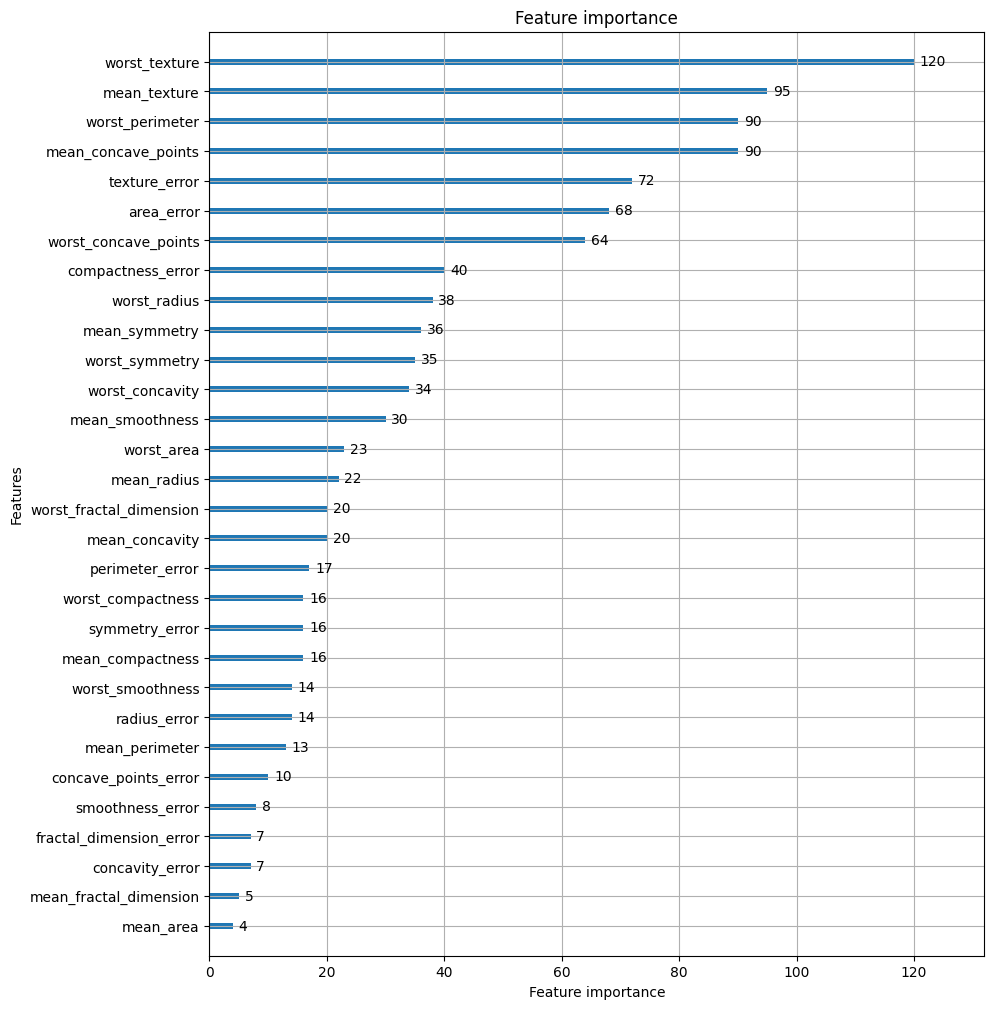

In [5]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)
plt.show()

## **베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝**
지금까지는 하이퍼 파라미터 튜닝을 위해 사이킷런에서 제공하는 Grid Search 방식을 적용했다. Grid Search 방식은 한 가지 주요한 단점이 있는데, 튜닝해야 할 하이퍼 파라미터 개수가 많을 경우 최적화 수행 시간이 오래 걸린다는 것이다. 여기에 개별 하이퍼 파라미터 값의 범위가 넓거나 학습 데이터가 대용량일 경우 최적화 시간이 더욱 늘어나게 된다.

XGBoost나 LightGBM은 성능이 매우 뛰어난 알고리즘이지만 하이퍼 파라미터 개수가 다른 알고리즘에 비해 많다.

아래와 같이 LightGBM의 6가지 하이퍼 파라미터를 최적화하려는 시도를 한다고 가정해보자.
max_depth는 [10,20,30,40,50]와 같이 5개의 값을, num_leaves는 4개의 값, colsample_bytree는 5개의 값, subsample은 5개의 값, min_child_weight는 4개의 값, reg_alpha는 3개의 값을 가질 경우 Grid Search 방식은 600회(5X4X5X5X4X3)에 걸쳐서 반복적으로 학습과 평가를 수행해야만 하기에 수행 시간이 매우 오래 걸릴 수밖에 없다.



```
 params = {
 'max_depth' = [10, 20, 30, 40, 50], 'num_leaves'= [35, 45, 55, 65],
 'colsample_bytree'=[0.5, 0.6, 0.7, 0.8, 0.9], 'subsample'= [0.5, 0.6, 0.7, 0.8, 0.9],
 'min_child_weight'= [10, 20, 30, 40], 'reg_alpha'=[0.01, 0.05, 0.1]
 }
```



이렇게 XGBoost나 LightGBM에 Grid Search를 적용할 경우 기하급수적으로 늘어나는 하이퍼 파라미터 최적화 시간 때문에 어쩔 수 없이 하이퍼 파라미터 개수를 줄이거나 개별 하이퍼 파라미터의 범위를 줄여야 한다.

따라서, 실무의 대용량 학습 데이터에 XGBoost나 LightGBM의 하이퍼 파라미터 튜닝 시에 Grid Search 방식보다는 다른 방식을 적용하곤 하는데 대표적으로 다음에 소개해 드릴 베이지안 최적화 기법이 있다.

### **베이지안 최적화 개요**
베이지안 최적화는 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력갑승ㄹ 가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식이다. 먼저 특정 함수 식을 알고 있다고 가정해보자. 가령 함수 $f(x,y) = 2x-3y$가 있다고 하면 $f(x,y)$의 반환 값을 최대/최소로 하는 $x,y$값을 찾아내는 것이다.

하지만, 함수 식 자체를 알 수 없고 단지 입력값과 반환값만 알 수 있는 상황에서 함수 반환값의 최대/최소 값을 찾기란 매우 어렵다. 물론 함수 식 자체가 위와 같이 간단한 경우라면 저확한 함수 식을 몰라도 수십 번의 입력값을 순차적으로 대입해 반환 값의 최대/최소를 찾을 수도 있다. 하지만, 함수 식 자체가 복잡하고 입력값들의 개수가 많거나 범위가 넓은 경우에는 입력값을 순차적으로 대입해서는 결코 짧은 시간 안에 최적 입력값을 찾을 수 없다. 이때 **베이지안 최적화를 이용하면 쉽고 빠르게 최적 입력값**을 찾을 수 있다.

베이지안 최적화는 이름에서 유추해 볼 수 있듯이 베이지안 확률에 기반을 두고 있는 최적화 기법이다. 베이지안 확률이 새로운 사건의 관측이나 새로운 샘플 데이터를 기반으로 사후 확률을 개선해 나가듯이, 베이지안 최적화는 새로운 데이터를 입력받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수 모델을 만들어 낸다.

베이지안 최적화를 구성하는 두 가지 중요 요소는 **대체 모델(Surrogate Model)**과 **획득 함수(Acquisition Function)**이다. 대체 모델은 획득 함수를 예측할 수 있는 입력값을 추천 받은 뒤 이를 기반으로 최적 함수 모델을 개선해 나가며, 획득 함수는 개선된 대체 모델을 기바능로 최적 입력값을 계산한다. 베이지안 최적화를 하이퍼 파라미터 튜닝에 사용될 때는 입력값이 하이퍼 파라미터가 된다. 즉, 대체 모델은 획득 함수가 계산한 하이퍼 파라미터를 입력받으면서 점차적으로 개선되며, 개선된 대체 모델을 기반으로 획득 함수는 더 정확한 하이퍼 파라미터를 계산할 수 있게 된다.

베이지안 최적화는 다음과 같은 단계로 구성된다.

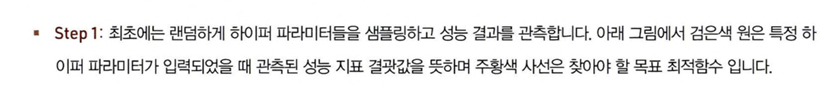

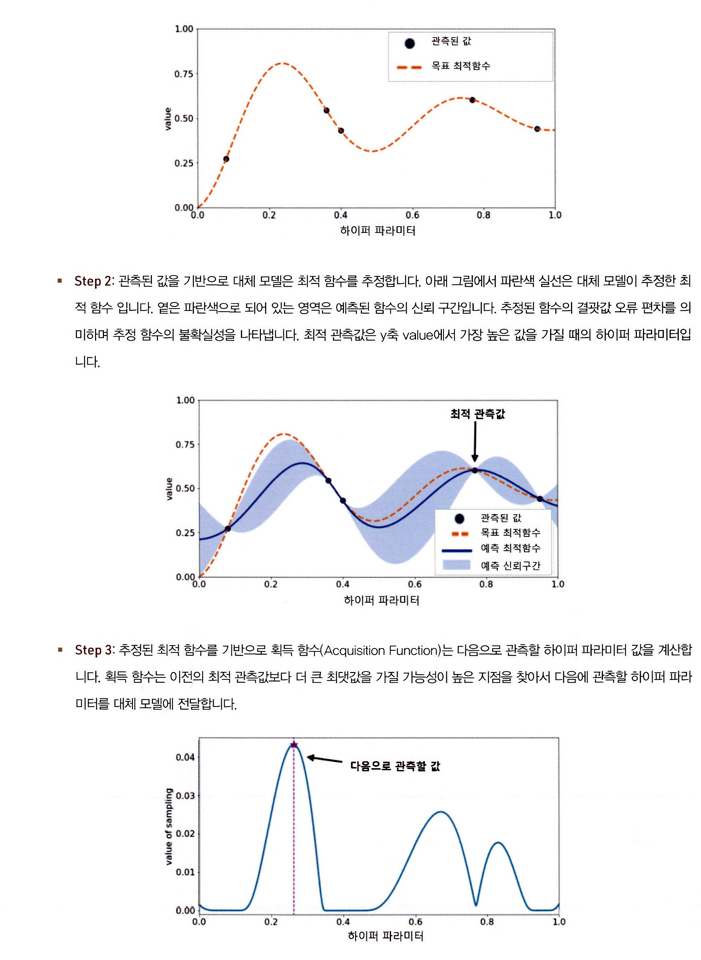

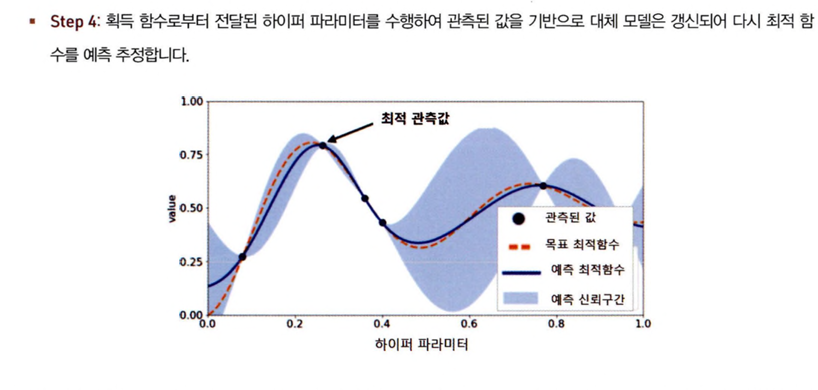

이런 방식으로 Step3와 Step4를 특정 횟수만큼 반복하게 되면 대체 모델의 불확실성이 개선되고 점차 정확한 최적 함수 추정이 가능하게 된다.

대체 모델은 최적 함수를 추정할 때 다양한 알고리즘을 사용할 수 있는데 일반적으로 가우시안 프로세스(Gaussian Process)를 적용한다.

### **HyperOpt 사용하기**
베이지안 최적화를 머신러닝 모델의 하이퍼 파라미터 튜닝에 적용할 수 있게 제공되는 여러 파이썬 패키지들이 있는데 대표적으로는 HyperOpt, Bayesian Optimization, Optuna 등을 들 수 있다. 이들 패키지의 사용법은 크게 다르지 않으며 여기서는 HyperOpt를 다룬다.

In [6]:
pip install hyperopt

HyperOpt를 활용하는 주요 로직은 아래와 같다.
- 첫째는 입력 변수명과 입력값의 검색 공간(Search Space) 설정이다.
- 둘째는 목적 함수(Objective Function)의 설정이다.
- 마지막으로 목적 함수의 반환 최솟값을 갖는 최적 입력값을 유추하는 것이다.

HyperOpt를 사용할 때 유의할 점은 다른 패키지와 다르게 목적 함수 반환 값의 최댓값이 아닌 최솟값을 갖는 최적 입력값을 유추한다는 것이다.

먼저 HyperOpt의 hp 모듈을 이용해 입력 변수명과 입력값의 검색 공간을 설정한다. 입력 변수명과 입력값 검색 공간은 파이썬 딕셔너리 형태로 설정되어야 하며, 키(key)값으로 입력 변수명, 밸류(value) 값으로 해당 입력 변수의 검색 공간이 주어진다. hp 모듈은 입력값의 검색 공간을 다양하게 설정할 수 있도록 여러가지 함수를 제공한다.


```
hp.quniform('x',-10,10,1)
```
과 같이 설정하면 입력 변수 x는 -10부터 10까지 1의 간격을 가지는 값들, 즉 [-10,-9,-8...,8,9,10]와 같은 값들을 가진다. 아래 코드는 2개의 입력 변수 x, y에 대해 입력값 검색 공간을 지정한다.


In [7]:
from hyperopt import hp

# -10부터 10까지 1 간격을 가지는 입력 변수 x와 -15부터 15까지 1 간격으로 입력 변수 y 설정
search_space = {'x': hp.quniform('x',-10,10,1), 'y':hp.quniform('y',-15,15,1)}

입력값의 검색 공간을 제공하는 대표적인 함수들은 아래와 같다. 함수 인자로 들어가는 label은 입력 변수명을 다시 적어준다. low는 최솟값, high는 최댓값이며 q는 간격이다.

- hp.quniform(lablel,low,high,q): label로 지정된 입력값 변수 검색 공간을 최솟값 low에서 최댓값 high까지 q의 간격을 가지고 설정.
- hp.uniform(label, low, high): 최솟값 low에서 최댓값 high까지 정규 분포 형태의 검색 공간 설정
- hp.randint(label, upper): 0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정
- hg.loguniform(label, low, high): exp(uniform(low,high)) 값을 반환하며, 반환 값의 log 변환된 값은 정규 분포 형태를 가지는 검색 공간 설정
- hp.choice(label, options): 검색 값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정. Options는 리스트나 튜플 형태로 제공되며 hp.choice('tree_criterion',['gini','entropy'])과 같이 설정하면 입력 변수 tree_criterion의 값을 'gini'와 'entropy'로 설정하여 입력함

다음으로 목적 함수를 생성해보자. 목적함수는 반드시 변숫값과 검색 공간을 갖는 딕셔너리를 인자로 받고, 특정 값을 반환하는 구조로 만들어져야 한다. 아래 예제는 search_space로 지정된 딕셔너리에서 x 입력 변숫값과 y 입력 변숫값을 추출하여 retval = $x^2 - 20y$로 계산된 값을 반환한다. 목적 함수의 반환값은 숫자형 단일값 외에도 딕셔너리 형태로 반환할 수 있다. 딕셔너리 형태로 반환할 경우에는 {'loss':retval, 'status':STATUS_OK}와 같이 loss와 status 키 값을 설정해 반환해야 한다.


In [8]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 갖는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
  x = search_space['x']
  y = search_space['y']
  retval = x**2 - 20*y

  return retval

이제 입력값의 검색 공간과 목적 함수를 설정했으면 목적 함수의 반환 값이 최소가 될 수 있는 최적의 입력값을 베이지안 최적화 기법에 기반하여 찾아주어야 한다. HyperOpt는 이러한 긴으을 수행할 수 있도록 fmin(objective, space, algo, max_evals, trials) 함수를 제공한다. fmin( ) 함수의 주요 인자는 아래와 같다.
- fn: 위에서 생성한 objective_func와 같은 목적 함수이다.
- space: 위에서 생성한 search_space와 같은 검색 공간 딕셔너리이다.
- algo: 베이지안 최적화 적용 알고리즘이다. 기본적으로 tpe.suggest이며 이는 HyperOpt의 기본 최적화 알고리즘인 TRE(Tree of Parzen Estimator)를 의미한다.
- max_evals: 최적 입력값을 찾기 위한 입력값 시도 횟수이다.
- trials: 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는 데 사용된다. Trials 클래스를 객체로 생성한 변수명을 입력한다.
- rstate: fmin( )을 수행할 때마다 동일한 결괏값을 가질 수 있도록 하는 랜덤 시드 값이다.

위에서 설정한 검색 공간인 search_space에서 목적 함수 object_func의 최솟값을 반환하는 최적 입력 변숫값을 찾을 수 있도록 베이지안 최적화를 수행해 보자.

In [9]:
from hyperopt import fmin, tpe, Trials
# 입력 결괏값을 저장한 Trials 객체값 생성
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████| 5/5 [00:00<00:00, 479.37trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


best_01 변숫값을 확인하면 x가 -4, y가 12로 되어있다. 입력 변수 x의 공간 -10 ~ 10, y의 공간 -15 ~ 15에서 목적 함수의 반환값을 $x^2-20y$로 설정했으므로 x는 0에 가까울수록 y는 15에 가까울수록 반환값이 최소로 근사될 수 있다. 확실하게 만족할 수준의 최적 x와 y값을 찾은 것은 아니지만, 5번의 수행으로 어느 정도 최적값에 다가설 수 있다는 점은 주지할 만하다.

In [10]:
trial_val = Trials()

# max_evals를 20회로 늘려 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20,
               trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████| 20/20 [00:00<00:00, 567.28trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


20회 반복 시 x는 2로, y는 15로 목적 함수의 최적 최솟값을 근사할 수 있는 결과를 도출했다. 완벽한 정답인 x=0은 도출했지만, 만일 그리드 서치와 같이 순차적으로 x,y 변숫값을 입력해 최소 함수 반환값을 찾는다면 최대 651(21X31)회의 반복이 필요할 수도 있는데 반해서 베이지안 최적화를 이용하면 20회 반복만으로 일정 수준의 최적값을 근사해낼 수 있다. 여기서 그리드 서치와 같은 방식에서 약간의 정교화된 알고맂므을 추가하면 반복 수치를 줄일 수 있기에 상대적으로 쵲거 값을 찾는 시간을 많이 줄여줄 수 있다.

fmin( ) 함수 수행 시 인자로 들어가는 Trials 객체는 함수의 반복 수행 시마다 입력되는 변숫값들과 함수 반환값을 속성으로 갖고 있다. Trials 객체의 주요 속성은 results와 vals가 있다. 이 중 result는 함수의 반복 수행 시마다 반환되는 반환값을 갖는다. 그리고 vals는 함수의 반복 수행 시마다 입력되는 입력 변숫값을 갖는다. 이들 중 먼저 results 속성을 알아보자. results는 파이썬 리스트 형태이며 리스트 내의 개별 원소는 {'loss': 함수 반환값, 'status': 반환 상태값}와 같은 딕셔니리로 갖고 있다.

In [11]:
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


max_evals=20으로 fmin( ) 함수는 20회의 반복 수행을 했으므로 results 속성은 loss와 status를 키 값으로 가지는 20개의 딕셔너리를 개별 원소로 가지는 리스트로 구성되어 있음을 알 수 있다. Trials 객체의 vals 속성은 딕셔너리 형태로 값을 갖는다. fmin( ) 함수 수행 시마다 입력되는 입력 변숫값들을 {'입력변수명': 개별 수행 시마다 입력된 값 리스트}와 같은 형태로 가지고 있다. 아래 예제를 통해 vals 값을 확인해 보자.

In [12]:
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


vals는 딕셔너리 형태의 값을 가지며, 입력 변수 x와 y를 키 값으로 가지며, x와 y 키 값의 value는 20회의 반복 수행 시마다 사용되는 입력값들을 리스트 형태로 가지고 있는 것을 알 수 있다.

이처럼 Trials 객체의 results와 vals 속성은 HyperOpt의 fmin( ) 함수의 수행 시마다 최적화되는 경과를 볼 수 있는 함수 반환값과 입력 변숫값들의 정보를 제공해준다. 하지만 이 값들을 그대로 보기에는 불편해 results와 vals 속성값들을 DataFrame으로 만들어 좀 더 직관적으로 값을 확인해 보자.

In [13]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses':losses})
result_df

x     y  losses
0   -6.0   5.0   -64.0
1   -4.0  10.0  -184.0
2    4.0  -2.0    56.0
3   -4.0  12.0  -224.0
4    9.0   1.0    61.0
5    2.0  15.0  -296.0
6   10.0   7.0   -40.0
7   -9.0 -10.0   281.0
8   -8.0   0.0    64.0
9   -0.0  -5.0   100.0
10  -0.0  -3.0    60.0
11   1.0   2.0   -39.0
12   9.0   4.0     1.0
13   6.0  10.0  -164.0
14   9.0   3.0    21.0
15   2.0   3.0   -56.0
16  -2.0 -14.0   284.0
17  -4.0  -8.0   176.0
18   7.0  11.0  -171.0
19  -0.0  -0.0     0.0

생성된 DataFrame을 통해 좀 더 직관적으로 수행 횟수별 입력 변수 x,y와 반환값 loss를 확인할 수 있다.

### **HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화**
HyperOpt를 이용해 XGBoost의 하이퍼 파라미터를 최적화 하는 방법도 앞 예제와 크게 다르지 않다. 적용해야 할 하이퍼 파라미터와 검색 공간을 설정하고, 목적 함수에서 XGBoost를 학습 후에 예측 성능 결과를 반환 값으로 설정한다. 그리고 fmin( ) 함수에서 목적 함수를 하이퍼 파라미터 검색 공간의 입력값들을 사용하여 최적의 예측 성능 결과를 반환하는 최적 입력값들을 결정하는 것이다. 하지만 주의해야 할 부분이 있다. 특정 하이퍼 파라미터들은 정숫값만 입력은 받는데 HyperOpt는 입력값과 반환값이 모두 실수형이기에 하이퍼 파라미터 입력 시 형변환을 해주어야 하는 부분, 그리고 HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기에 성능 값이 클수록 좋은 성능 지표일 경우 -1을 곱해줘야 하는 것이다.

In [14]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=156)

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                            test_size=0.1, random_state=156)

In [15]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1 간격으로
# colsample_bytree는 0.5에서 1 사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth': hp.quniform('max_depth',5,20,1),
                    'min_child_weight': hp.quniform('min_child_weight',1,2,1),
                    'learning_rate': hp.uniform('learning_rate',0.01,0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree',0.5,1)}

다음으로 목적 함수를 설정해보자. 하이퍼 파라미터 튜닝을 위한 목적 함수는 검색 공간에서 설정한 하이퍼 파라미터들을 입력받아 XGBoost를 학습하고 평가지표를 반환할 수 있도록 구성한다. 이때 유의할 사항이 두 가지 있다.

첫번째는 검색 공간에서 목적 함수로 입력되는 모든 인자들은 실수형 값이므로 이들을 XGBoostClassifier의 정수형 하이퍼 파라미터값으로 설정할 때는 정수형으로 형변환을 해야 한다.

두번째는 HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기에 정확도와 같이 값이 클수록 좋은 성능 지표일 경우 -1을 곱한 뒤 반환하여 더 큰 성능 지표가 더 작은 반환값이 되도록 만들어 줘야 한다는 것이다.

앞에서 설명한 이 두 가지 사항에 유의하며 목적 함수인 objective_func( )를 만들어보자.

In [16]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin( )에서 입력된 search_space 값으로 입력된 모든 값은 실수형임
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함
# 정확도는 높을수록 더 좋은 수치이므로 -1을 곱해 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
  # 수행 시간 절약을 위해 nestimators는 100으로 축소
  xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          learning_rate=search_space['learning_rate'],
                          colsample_bytree=search_space['colsample_bytree'],
                          eval_metric='logloss')
  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)

  # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함
  return {'loss':-1*np.mean(accuracy), 'status': STATUS_OK}

이제 fmin( )을 이용해 최적 하이퍼 파라미터를 도출해보자.

In [18]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|██████████| 50/50 [00:46<00:00,  1.07trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.9599446282177103, 'learning_rate': 0.15480405522751015, 'max_depth': 6.0, 'min_child_weight': 2.0}


정수형 하이퍼 파라미터인 max_depth, min_child_weight가 실수형 값으로 도출되었음에 유의해야 한다.

fmin( )으로 추출되 최적 하이퍼 파라미터를 직접 XGBClassifier에 인자로 입력하기 전에 정수형 하이퍼 파라미터는 정수형으로 형 변환을, 실수형 하이퍼 파라미터는 소수점 5자리까지만 변환 후 확인해보자.

In [19]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
  round(best['colsample_bytree'],5), round(best['learning_rate'],5),
      int(best['max_depth']), int(best['min_child_weight'])
))

colsample_bytree:0.95994, learning_rate:0.1548, max_depth:6, min_child_weight:2


도출된 최적 하이퍼 파라미터들을 이용해 XGBClassifier를 재학습한 후 성능 평가 결과를 확인해보자. XGBoost의 조기 중단을 검증 데이터 세트로 활용하며 n_estimators는 400으로 증가시킨다.

In [20]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate = round(best['learning_rate'],5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'],5))

evals = [(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.56834	validation_1-logloss:0.60660


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.47552	validation_1-logloss:0.54538
[2]	validation_0-logloss:0.40208	validation_1-logloss:0.48735
[3]	validation_0-logloss:0.34468	validation_1-logloss:0.45698
[4]	validation_0-logloss:0.29775	validation_1-logloss:0.41729
[5]	validation_0-logloss:0.26004	validation_1-logloss:0.39167
[6]	validation_0-logloss:0.22681	validation_1-logloss:0.36682
[7]	validation_0-logloss:0.20096	validation_1-logloss:0.34593
[8]	validation_0-logloss:0.17762	validation_1-logloss:0.33030
[9]	validation_0-logloss:0.15762	validation_1-logloss:0.31918
[10]	validation_0-logloss:0.14233	validation_1-logloss:0.30772
[11]	validation_0-logloss:0.12769	validation_1-logloss:0.30104
[12]	validation_0-logloss:0.11566	validation_1-logloss:0.29621
[13]	validation_0-logloss:0.10479	validation_1-logloss:0.29157
[14]	validation_0-logloss:0.09640	validation_1-logloss:0.28495
[15]	validation_0-logloss:0.08707	validation_1-logloss:0.28055
[16]	validation_0-logloss:0.08067	validation_1-logloss:0.27775
[

## **스태킹 앙상블**
스태킹(Stacking)은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅(Bagging) 및 부스팅(Boosting)과 공통점을 가지고 있다. 하지만 가장 큰 차이점은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 것이다. 즉, 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식이다.

스태킹 모델은 두 종류의 모델이 필요하다. 첫 번째는 개별적인 기반 모델이고, 두 번째 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어 학습하는 최종 메타 모델이다. 스태킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것이다.

스태킹은 현실 모델에 적용하는 경우는 많지 않고, 대회에서 높은 순위를 차지하기 위해 조금이라도 성능 수치를 높여야 할 경우 자주 사용된다.

스태킹 모델 개념의 간단한 다이어그램은 옆의 그림과 같다. 여러 개의 모델에 대한 예측값을 합한 후, 즉 스태킹 형태로 쌓은 뒤 이에 대한 예측을 다시 수행하는 것이다.

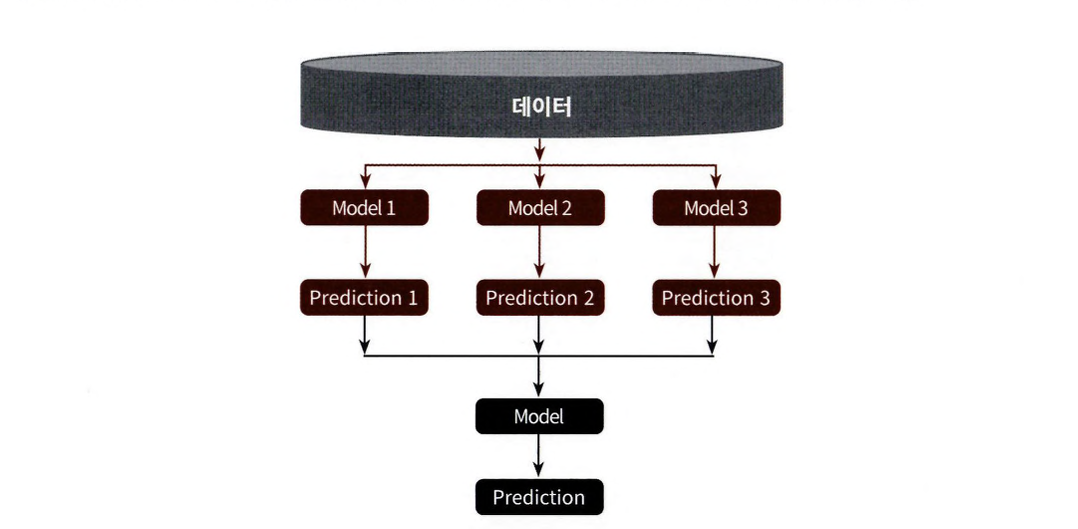

M개의 로우, N개의 피처를 가진 데이터 세트에 스태킹 앙상블을 적용한다고 가정해보자. 그리고 학습에 사용할 ML 알고리즘 모델은 모두 3개이다. 먼저 모델별로 각각 학습을 시킨 뒤 예측을 수행하면 각각 M개의 로우를 가진 1개의 레이블 값을 도출할 것이다. 모델별로 도출된 예측 레이블 값을 다시 합해 새로운 데이터 세트를 만들고 이렇게 스태킹된 데이터 세트에 대해 최종 모델을 적용해 최종 예측을 하는 것이 스태킹 앙상블 모델이다.

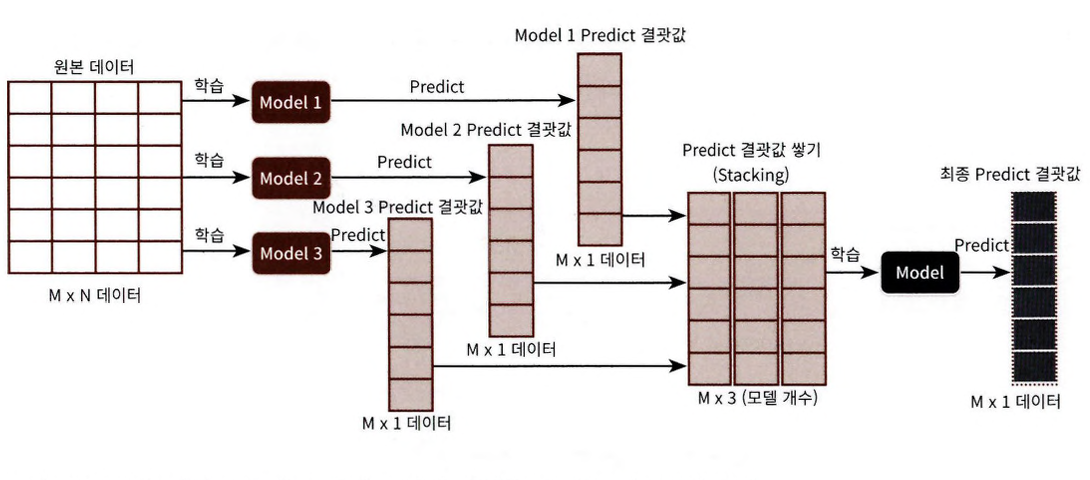

### **기본 스태킹 모델**


In [22]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label ,
                                                       test_size=0.2 , random_state=0)

스태킹에 사용될 머신러닝 알고리즘 클래스를 생성한다. 개별 모델은 KNN, 랜덤 포레스트, 결정 트리, 에이다부스트이며, 이들 모델의 예측 결과를 합한 데이터 세트로 학습/예측하는 최종 모델은 로지스틱 회귀이다.

In [23]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression()

In [24]:
# 개별 모델을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [25]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


개별 알고리즘으로부터 예측된 예측값을 칼럼 레벨로 옆으로 붙여 피처 값으로 만들어 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 다시 사용해보자. 반환된 예측 데이터 세트는 1차원 형태의 ndarray이므로 먼저 반환된 예측 결과를 행 형태로 붙인 뒤, 넘파이의 transpose( )를 이용해 행과 열 위치를 바꾼 ndarray로 변환하면 된다.

In [26]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [27]:
# 최종 메타 모델 학습 및 예측 정확도 측정
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9649


개별 모델의 예측 데이터를 스태킹으로 재구성해 최종 메타 모델에서 학습하고 예측한 결과 개별 모델 정확도보다 향상되었다.

### **CV 세트 기반의 스태킹**
CV 세트 기반의 스태킹 모델은 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용한다. 앞 예제에서 마지막에 메타 모델로 최종 학습할 때 레이블 데이터 세트로 학습 데이터가 아닌 테스트용 레이블 데이터 세트를 기반으로 학습했기에 과적합 문제가 발생할 수 있다.

CV 세트 기반의 스태킹은 이에 대한 개선을 위해 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤 이를 기반으로 메타 모델이 학습과 예측을 수행한다. 이는 다음과 같이 2단계의 스텝으로 구분될 수 있다.

- **스텝 1**: 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성
- **스텝 2**: 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐 메타 모델이 학습할 최종 학습용 데이터 세트를 생성. 각 모델들이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐 메타 모델이 예측할 최종 테스트 데이터 세트를 생성. 메타 모델은 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터를 기반으로 학습한 뒤, 최종적으로 생성된 테스트 데이터 세트를 예측하고, 원본 테스트 데이터의 레이블 데이터를 기반으로 평가.

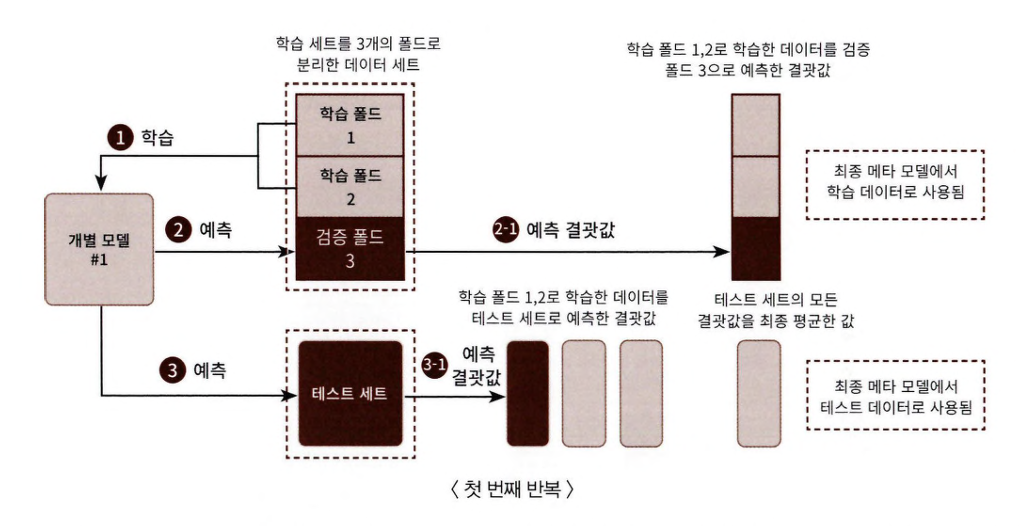

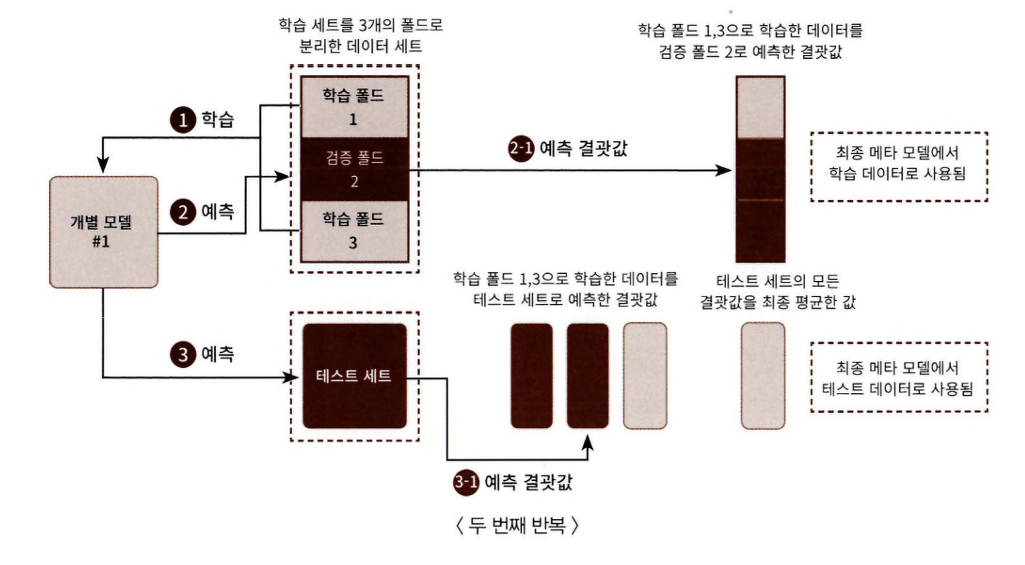

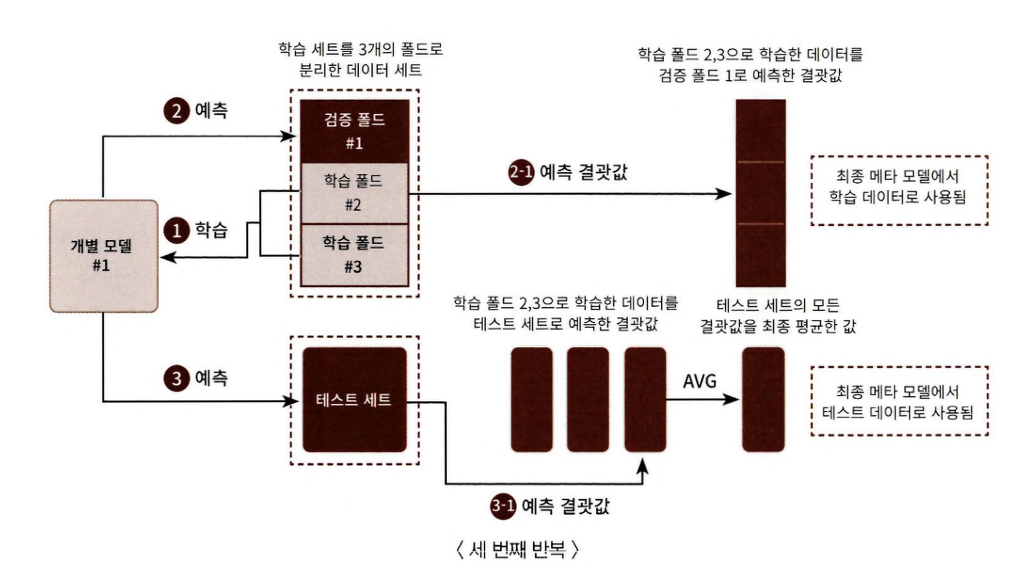

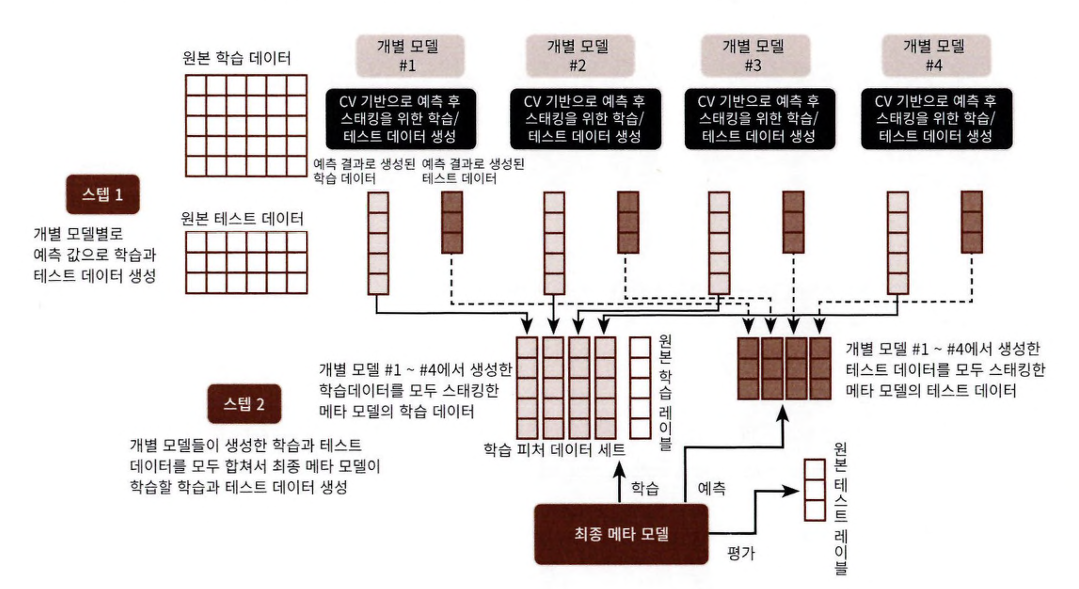

스텝1 부분을 코드로 구현해보자. get_stacking_base_datasets( ) 함수를 생성한다. 이 함수에서는 개별 모델의 Classifier 객체, 원본인 학습용 피처 데이터, 원본인 학습용 레이블 데이터, 원본인 테스트 피처 데이터, 그리고 K 폴드를 몇 개로 할지를 파라미터로 입력받는다. 함수 내에서는 폴드의 개수만큼 반복을 수행하며 폴드된 학습용 데이터로 학습한 뒤 예측 결괏값을 기반으로 메타 모델을 위한 학습용 데이터와 테스트용 데이터를 새롭게 생성한다.

In [33]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print (model.__class__.__name__,'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트:', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
    train_fold_pred[valid_index,:] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

이제 여러 개의 분류 모델별로 stack_base_moel( ) 함수를 수행한다. 개별 모델은 앞의 기본 스태킹 모델에서 생성한 KNN, 랜덤 포레스트, 결정 트리, 에이다부스트 모델이며, 이들 모델별로 get_stacking_base_datasets( ) 함수를 호출해 각각 메타 모델이 추후해 사용할 학습용, 테스트용 데이터 세트를 반환한다.

In [34]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
RandomForestClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
DecisionTreeClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작
AdaBoostClassifier model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
	 폴드 세트: 5 시작
	 폴드 세트: 6 시작


스텝 2를 구현해보자. get_stacking_base_datasets( ) 호출로 반환된 각 모델별 학습 데이터와 테스트 데이터를 합치기만 하면 된다.

In [35]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


이렇게 만들어진 Stack_final_X_train은 메타 모델이 학습할 학습용 피처 데이터 세트이다. 그리고 Stack_final_X_test는 메타 모델이 예측할 테스트용 피처 데이터 세트이다. 스태킹 학습 피처 데이터는 원본 학습 피처 데이터와 로우 크기는 같으며, 4개의 개별 모델 예측값을 합친 것이므로 칼럼 크기는 4이다.

최종 메타 모델인 로지스틱 회귀를 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 학습한 후에 스태킹된 테스트 데이터 세트로 예측하고, 예측 결과를 원본 테스트 레이블 데이터와 비교해 정확도를 측정해보자.

In [36]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


개별 모델의 알고리즘에서 파라미터 튜닝을 최적으로 하지 않았지만, 스태킹을 이루는 모델은 최적으로 파라미터를 튜닝한 상태에서 스태킹 모델을 만드는 것이 일반적이다.